# 関西学院大学集中講義 L06

# セットアップ
## L1 と同じように Google drive をマウントする。


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## パスの設定


In [2]:
import os, sys
os.environ['ATOMDB'] = "/content/drive/MyDrive/20240823_Kwansei/atomdb/"
sys.path.append('/content/drive/MyDrive/20240823_Kwansei/modules/')
os.chdir("/content/drive/MyDrive/20240823_Kwansei/atomdb/")
!ls ${ATOMDB}

100   320		  apec_nei_line.fits	   ElectronCloud
200   32-1		  apec_nei.par		   filemap
210   321		  apec.par		   Release_Notes.txt
21-1  32-2		  APED			   spectra_2FDC29992CCA2999_2DDA29992CCA2999.pkl
211   322		  atomdb_examples_2_1.pdf  temp-plot.html
300   apec_coco.fits	  atomdb_examples_2_1.svg  userdata
310   apec_line.fits	  atomdb_examples_2_2.pdf  VERSION
31-1  apec_linelist.fits  atomdb_examples_2_2.svg
311   apec_nei_comp.fits  atomdb.tar.gz


## 必要なパッケージのインストール


In [3]:
# 必要なパッケージをインストール
!pip install skyfield
!pip install  geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.2/336.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.3/232.3 kB 12.8 MB/s eta 0:00:00


In [4]:
import numpy as np
import skyfield.api
from skyfield.api import load, wgs84
import sgp4.ext
import plotly.express as px
import astropy.time
import astropy.coordinates
from astropy import units as u
from astropy import constants as const
import datetime
#
import matplotlib.pyplot as plt
import geopandas
import seaborn as sns
palette=sns.color_palette("hls",16)

# Constants
TIMESCALE: skyfield.api.Timescale = skyfield.api.load.timescale()
MU: np.float64 = np.float64(3.986004418)

# JPL Almanac
eph = load('de421.bsp')
print('Ready')

[#################################] 100% de421.bsp


Ready


In [5]:
# Time span.
def get_span(datetime_start, datetime_end, tstep):
    span = [datetime_start]
    while span[-1] < datetime_end:
        span.append(span[-1] + datetime.timedelta(seconds=tstep))
    return span

# Get TLE
def get_tle(norad_num):
    url = 'https://celestrak.org/NORAD/elements/gp.php?CATNR={}'.format(norad_num)
    filename = 'tle-CATNR-{}.txt'.format(norad_num)
    satellite = skyfield.api.load.tle_file(url, filename=filename)
    return satellite[0]

# Projected point
def get_lonlat(satellite, datetime_start, datetime_end, tstep, cstep):
    span=get_span(datetime_start, datetime_end, tstep)
    geocentric = [satellite.at(TIMESCALE.utc(_span)) for _span in span]
    lat = np.array([wgs84.latlon_of(_geocentric)[0].degrees for _geocentric in geocentric])
    lon = np.array([wgs84.latlon_of(_geocentric)[1].degrees for _geocentric in geocentric])
    colors=[palette[int(tstep/cstep*i//1)%len(palette)] for i in range(len(lat))]
    return lon, lat, colors


<ipython-input-6-e6b8326fab16>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


NameError: name 'df' is not defined

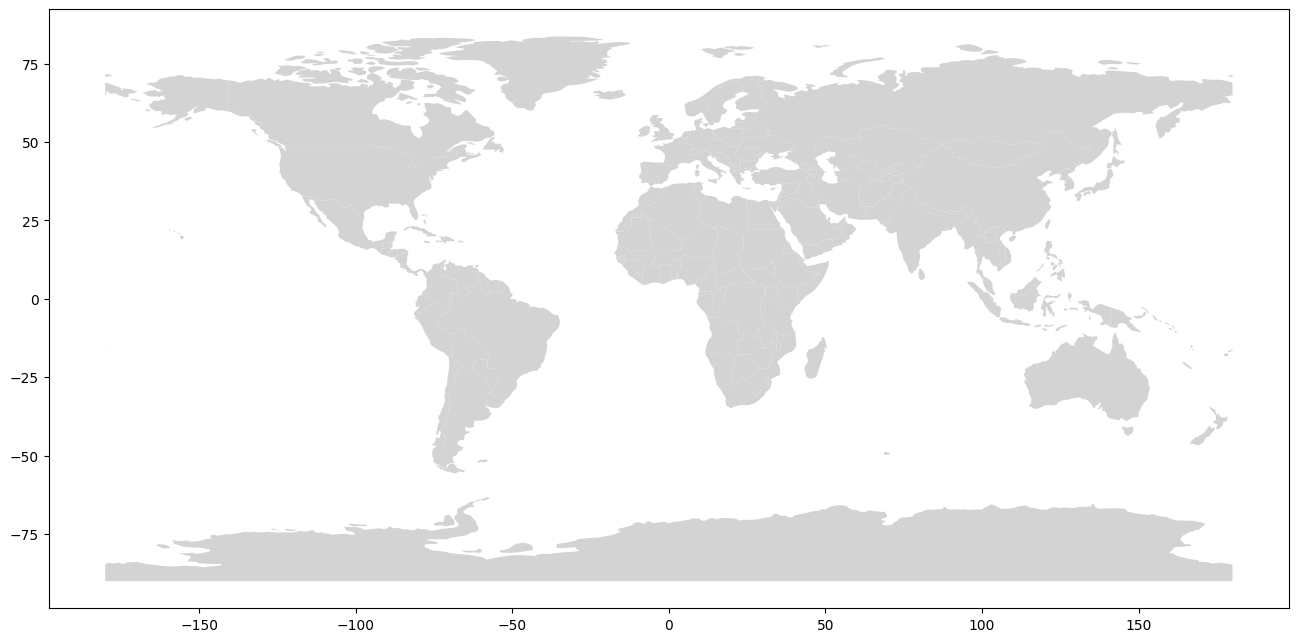

In [6]:
# Getting world map data from geo pandas
worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="lightgrey", ax=ax)

# Plotting tourist source markets
x = df['Longitude']
y = df['Latitude']
z = df['Number of tourists']
plt.scatter(x, y,
              s=0.025*z,
              c=z,
              alpha=0.6,
              cmap='autumn'
            )
plt.colorbar(label='Number of tourists')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title("Tourist arrivals from main countries to Sri Lanka\n  Year : 2021")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()